Tugas Kelompok PBA

In [ ]:
!pip install datasets

     |████████████████████████████████| 290 kB 8.2 MB/s 
     |████████████████████████████████| 132 kB 57.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
     |████████████████████████████████| 243 kB 66.8 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 192 kB 43.2 MB/s 
     |████████████████████████████████| 271 kB 47.7 MB/s 
     |████████████████████████████████| 160 kB 64.0 MB/s 


In [ ]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

Downloading:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = dataset.data["train"].to_pandas()
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis:


In [ ]:
unuse = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']

feats_df = df.drop(columns = unuse)

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Cleaning Data

In [ ]:
import re
def clean_text(text):
    # menghapus backslash dan apostrophe 
    text = re.sub("\'", "", text) 
    # menghapus semua karakter selain alfabet
    text = re.sub("[^a-zA-Z]"," ",text) 
    # menghapus whitespaces 
    text = ' '.join(text.split()) 
    # mengubah teks ke lowercase
    text = text.lower() 
    
    return text

In [ ]:
feats_df['text'] = feats_df['text'].apply(lambda x: clean_text(x))

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,that game hurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,sexuality shouldn t be a grouping category it ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,you do right if you dont care then fuck em,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,man i love reddit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,name was nowhere near them he was by the falcon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Visualisasi Frekuensi Kata

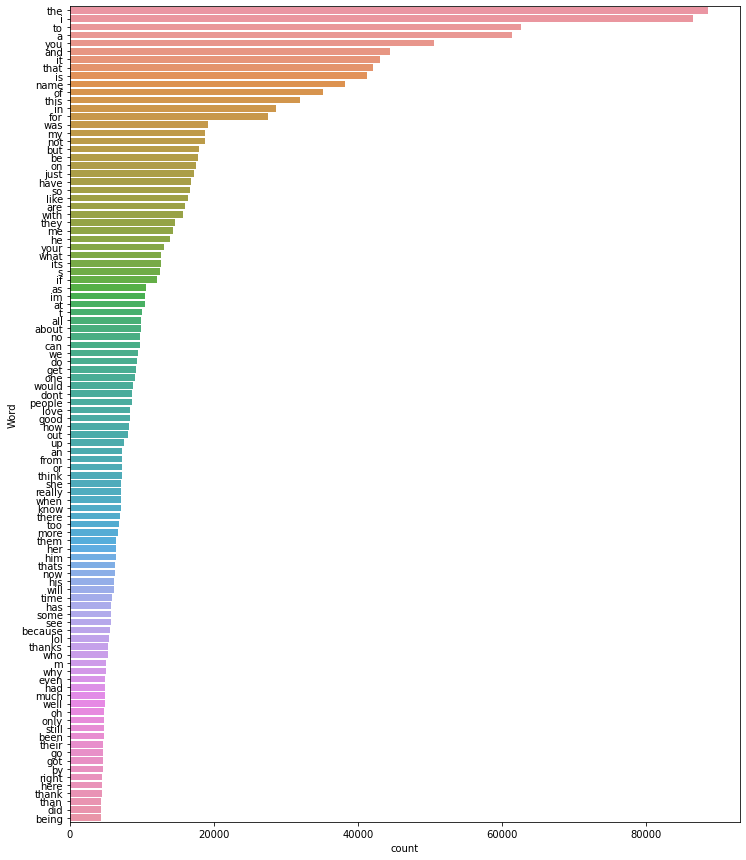

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # memilih top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualisasi masing-masing kata dan frekuensi nya
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(feats_df['text'], 100)

## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

feats_df['text'] = feats_df['text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
feats_df.head()

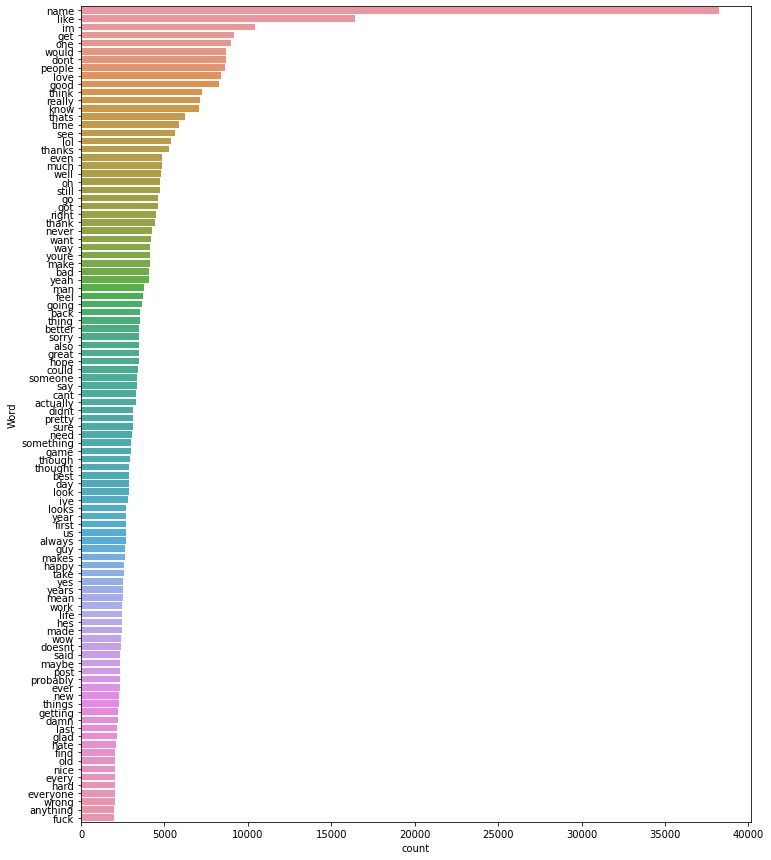

In [ ]:
freq_words(feats_df['text'], 100)

## Tokenization

In [ ]:
from nltk.tokenize import SpaceTokenizer
from nltk.tokenize import word_tokenize

words = []

for i in range(0, feats_df['text'].size):
  sTokenizer = SpaceTokenizer()
  words.append(sTokenizer.tokenize(feats_df['text'][i]))

## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

for i in range(0, len(words)):
  print(words[i])

  for w in words[i]:
    print(w, " : ", ps.stem(w))

Streaming output truncated to the last 5000 lines.
calories  :  calori
bloated  :  bloat
much  :  much
look  :  look
pregnant  :  pregnant
['buy', 'bitesize', 'toad', 'holes', 'tesco', 'amazing', 'look', 'like', 'use', 'hotdogs', 'imagine', 'would', 'almost', 'good']
buy  :  buy
bitesize  :  bites
toad  :  toad
holes  :  hole
tesco  :  tesco
amazing  :  amaz
look  :  look
like  :  like
use  :  use
hotdogs  :  hotdog
imagine  :  imagin
would  :  would
almost  :  almost
good  :  good
['cute', 'pics', 'whats', 'triangle', 'chin', 'left']
cute  :  cute
pics  :  pic
whats  :  what
triangle  :  triangl
chin  :  chin
left  :  left
['family', 'friendly', 'sub', 'please', 'dont', 'say', 'mcc', 'word']
family  :  famili
friendly  :  friendli
sub  :  sub
please  :  pleas
dont  :  dont
say  :  say
mcc  :  mcc
word  :  word
['dont', 'know', 'dude', 'im', 'saying', 'weird', 'people', 'super', 'doubtful', 'whenever', 'posts', 'like', 'crop']
dont  :  dont
know  :  know
dude  :  dude
im  :  im
saying 

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import numpy as np

X = feats_df["text"]
y = np.asarray(feats_df[feats_df.columns[1:]])

In [ ]:
X

0                                                 game hurt
1         sexuality grouping category makes different ot...
2                                   right dont care fuck em
3                                           man love reddit
4                                  name nowhere near falcon
                                ...                        
211220                                  everyone likes name
211221         well imported gazillion country gets serious
211222                                        looks amazing
211223    fda plenty criticize like usually criticized h...
211224     desktop link r helperbot downvote remove counter
Name: text, Length: 211225, dtype: object

In [ ]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
vetorizar = TfidfVectorizer(max_features=3000, max_df=0.85)
vetorizar.fit(X)

TfidfVectorizer(max_df=0.85, max_features=3000)

## 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 3.2 MB/s 


## Naive Bayes Classification 

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train_tfidf, y_train)


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, accuracy_score
pred = classifier.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test ,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.10      0.89      0.18      5739
           1       0.05      0.92      0.10      3067
           2       0.04      0.89      0.09      2664
           3       0.08      0.84      0.14      4457
           4       0.09      0.78      0.16      5723
           5       0.03      0.88      0.06      1892
           6       0.04      0.87      0.07      2442
           7       0.05      0.88      0.09      3148
           8       0.02      0.80      0.04      1256
           9       0.04      0.87      0.08      2790
          10       0.06      0.86      0.11      3799
          11       0.03      0.85      0.06      1759
          12       0.01      0.67      0.03       814
          13       0.03      0.85      0.06      1860
          14       0.02      0.77      0.04      1031
          15       0.07      0.94      0.14      3834
          16       0.01      0.44      0.01       203
          17       0.04    

In [ ]:
new_sentences = ["I'm angry because I'm too hungry"]
new_sentence_tfidf = vetorizar.transform(new_sentences)

predicted_sentences = classifier.predict(new_sentence_tfidf)
print(predicted_sentences.toarray())

[[0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1]]
